In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bird.csv')
df.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [3]:
description = df.describe()
print(description)

               id        huml        humw       ulnal       ulnaw        feml  \
count  420.000000  419.000000  419.000000  417.000000  418.000000  418.000000   
mean   209.500000   64.650501    4.370573   69.115372    3.597249   36.872416   
std    121.387808   53.834549    2.854617   58.784775    2.186747   19.979082   
min      0.000000    9.850000    1.140000   14.090000    1.000000   11.830000   
25%    104.750000   25.170000    2.190000   28.050000    1.870000   21.297500   
50%    209.500000   44.180000    3.500000   43.710000    2.945000   31.130000   
75%    314.250000   90.310000    5.810000   97.520000    4.770000   47.120000   
max    419.000000  420.000000   17.840000  422.000000   12.000000  117.070000   

             femw        tibl        tibw        tarl        tarw  
count  419.000000  418.000000  419.000000  419.000000  419.000000  
mean     3.220883   64.662823    3.182339   39.229976    2.930024  
std      2.023581   37.838145    2.080827   23.184313    2.185673 

In [122]:
print(df.columns)

Index(['id', 'huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw',
       'tarl', 'tarw', 'type'],
      dtype='object')


In [4]:
correlation = df.corr()
print(correlation)

             id      huml      humw     ulnal     ulnaw      feml      femw  \
id     1.000000 -0.637165 -0.612314 -0.564029 -0.644609 -0.439659 -0.521161   
huml  -0.637165  1.000000  0.916572  0.976377  0.887025  0.771054  0.850474   
humw  -0.612314  0.916572  1.000000  0.900770  0.957790  0.871023  0.936179   
ulnal -0.564029  0.976377  0.900770  1.000000  0.871604  0.759309  0.837922   
ulnaw -0.644609  0.887025  0.957790  0.871604  1.000000  0.826243  0.898133   
feml  -0.439659  0.771054  0.871023  0.759309  0.826243  1.000000  0.944668   
femw  -0.521161  0.850474  0.936179  0.837922  0.898133  0.944668  1.000000   
tibl  -0.549718  0.826899  0.820093  0.761994  0.797017  0.859952  0.868170   
tibw  -0.576338  0.869339  0.901478  0.818507  0.870392  0.904081  0.959632   
tarl  -0.382144  0.695027  0.676207  0.653622  0.642814  0.832182  0.778986   
tarw  -0.512848  0.751122  0.892047  0.737557  0.870590  0.869299  0.901852   

           tibl      tibw      tarl      tarw  
id 

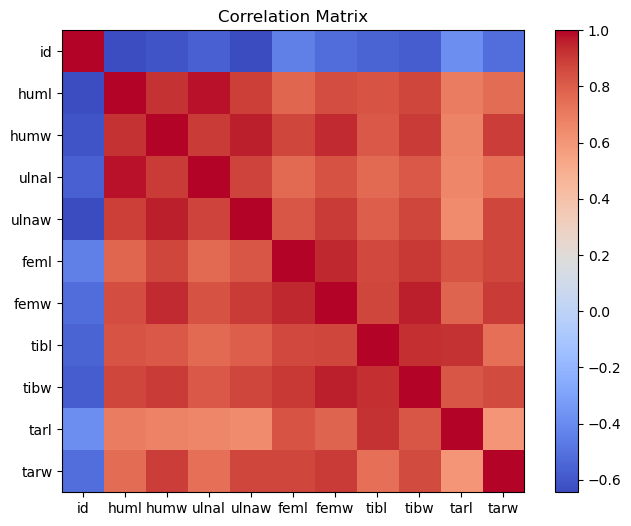

In [5]:
plt.figure(figsize=(8, 6))
plt.imshow(correlation, cmap='coolwarm', interpolation='nearest')
plt.colorbar()  
plt.title('Correlation Matrix')
plt.xticks(ticks=np.arange(len(correlation.columns)), labels=correlation.columns)
plt.yticks(ticks=np.arange(len(correlation.index)), labels=correlation.index)
plt.show()

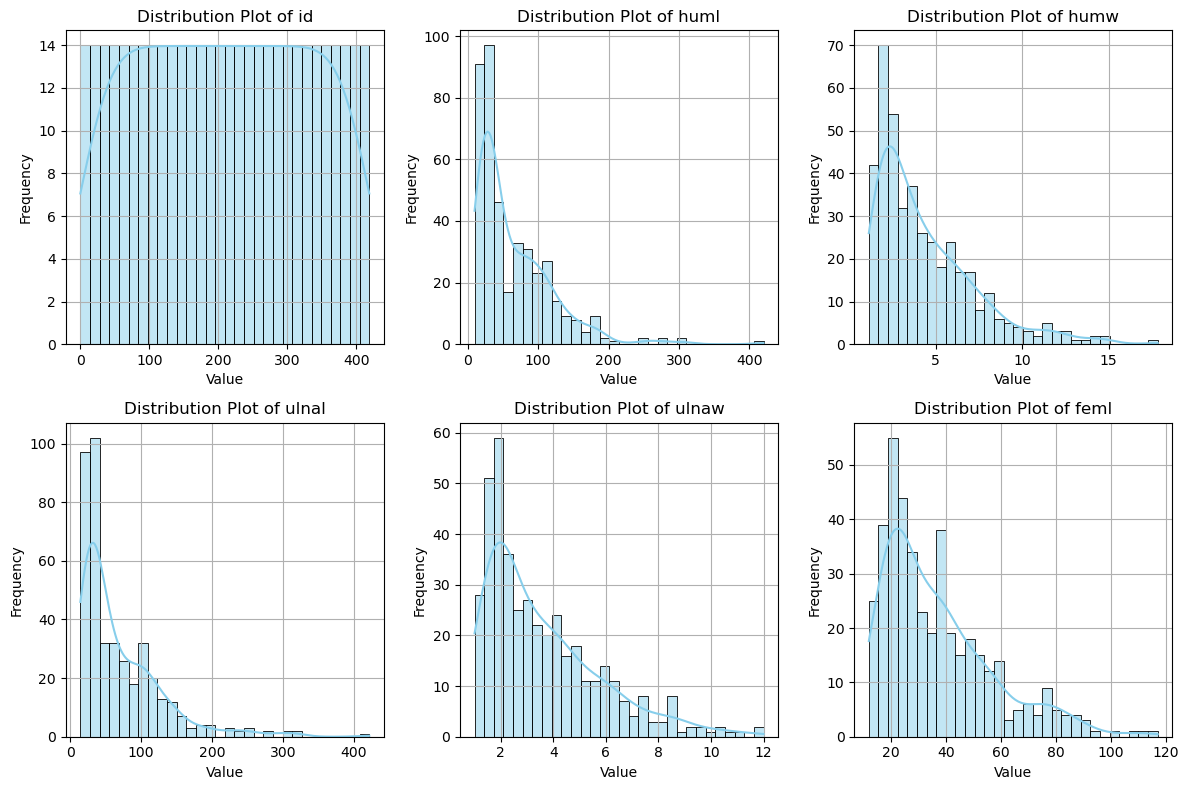

In [6]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns):
    if i < 6:
        plt.subplot(2, 3, i + 1)
        sns.histplot(df[col], bins=30, kde=True, color='skyblue')
        plt.title(f'Distribution Plot of {col}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
class_distribution = df['type'].value_counts()
print(class_distribution)

SO    128
SW    116
W      65
R      50
P      38
T      23
Name: type, dtype: int64


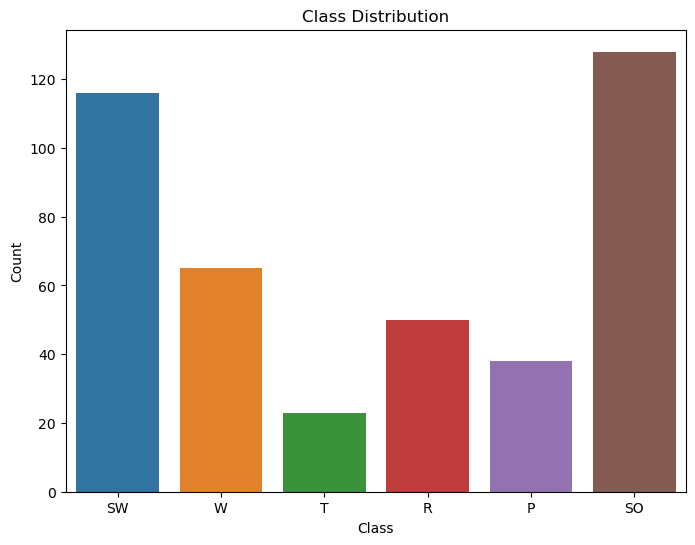

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [25]:
corr_matrix = df.corr().abs()

In [26]:
high_correlation = (corr_matrix >= 0.90) & (corr_matrix < 1)

In [27]:
correlated_pairs = [(corr_matrix.index[i], corr_matrix.columns[j]) for i, j in zip(*high_correlation.values.nonzero())]

In [28]:
features_to_drop = set()
for feat1, feat2 in correlated_pairs:
    if feat1 not in features_to_drop:
        features_to_drop.add(feat2)

In [29]:
df_new = df.drop(columns=features_to_drop)

In [30]:
print("Dropped features:", features_to_drop)

Dropped features: {'ulnal', 'tarl', 'femw', 'humw', 'tibw'}


In [31]:
print(df_new.head())

   id   huml  ulnaw   feml   tibl  tarw type
0   0  80.78   4.88  41.81   5.50  3.84   SW
1   1  88.91   5.59  47.04  80.22  4.01   SW
2   2  79.97   5.28  43.07  75.35  3.34   SW
3   3  77.65   4.77  40.04  69.17  3.41   SW
4   4  62.80   3.73  33.95  56.27  3.13   SW


In [32]:
class_distribution_new = df_new['type'].value_counts()
print(class_distribution_new)

SO    128
SW    116
W      65
R      50
P      38
T      23
Name: type, dtype: int64


In [36]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      420 non-null    int64  
 1   huml    419 non-null    float64
 2   ulnaw   418 non-null    float64
 3   feml    418 non-null    float64
 4   tibl    418 non-null    float64
 5   tarw    419 non-null    float64
 6   type    420 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 23.1+ KB


In [37]:
null_counts = df_new.isnull().sum()
print("The total null value counts:\n", null_counts)

The total null value counts:
 id       0
huml     1
ulnaw    2
feml     2
tibl     2
tarw     1
type     0
dtype: int64


In [38]:
df_new.fillna(df_new.median(), inplace=True)

In [39]:
null_counts = df_new.isnull().sum()
print("The total null value counts:\n", null_counts)

The total null value counts:
 id       0
huml     0
ulnaw    0
feml     0
tibl     0
tarw     0
type     0
dtype: int64


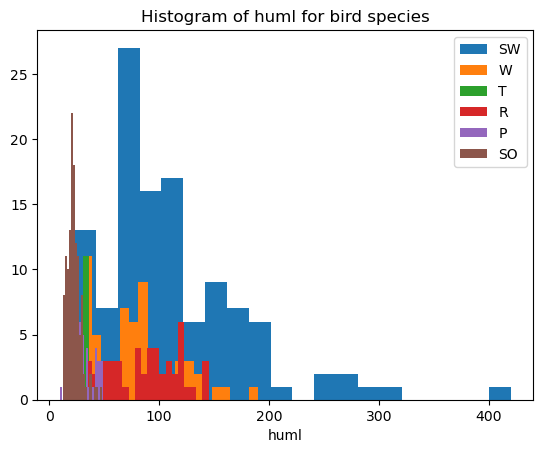

In [41]:
obj= df['type'].unique()
for obj_type in obj:
    x= df_new[df_new['type']==obj_type]
    plt.hist(x['huml'],bins=20)
    plt.xlabel('huml')
    plt.title('Histogram of huml for bird species')
    plt.legend(obj)

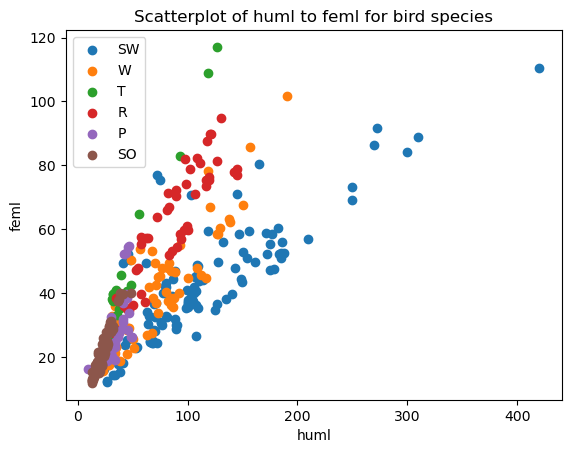

In [59]:
for obj_type in obj:
    x= df[df['type']==obj_type]
    plt.scatter(x['huml'],x['feml'],label=obj_type)
    plt.xlabel('huml')
    plt.ylabel('feml')
    plt.title('Scatterplot of huml to feml for bird species')
    plt.legend()

In [60]:
from imblearn.over_sampling import SMOTE
import pandas as pd

In [61]:
X = df_new.drop(columns=['type'])  # Assuming 'type' is the target variable
y = df_new['type']

In [62]:
smote = SMOTE()

In [63]:
X_resampled, y_resampled = smote.fit_resample(X, y)

In [64]:
y_resampled_series = pd.Series(y_resampled)

In [65]:
print("Class distribution after oversampling:")
print(y_resampled_series.value_counts())

Class distribution after oversampling:
W     128
P     128
R     128
T     128
SO    128
SW    128
Name: type, dtype: int64


In [66]:
dummies = pd.get_dummies(y_resampled_series)
dummies

,P,R,SO,SW,T,W
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
763,0,0,0,0,0,1
764,0,0,0,0,0,1
765,0,0,0,0,0,1
766,0,0,0,0,0,1


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
df_resampled = pd.concat([X_resampled,dummies], axis=1)

In [69]:
print(df_resampled.head())

   id   huml  ulnaw   feml   tibl  tarw  P  R  SO  SW  T  W
0   0  80.78   4.88  41.81   5.50  3.84  0  0   0   1  0  0
1   1  88.91   5.59  47.04  80.22  4.01  0  0   0   1  0  0
2   2  79.97   5.28  43.07  75.35  3.34  0  0   0   1  0  0
3   3  77.65   4.77  40.04  69.17  3.41  0  0   0   1  0  0
4   4  62.80   3.73  33.95  56.27  3.13  0  0   0   1  0  0


In [75]:
X = df_resampled.drop(['P', 'R', 'SO', 'SW', 'T', 'W'], axis=1)

In [76]:
y = df_resampled[['P', 'R', 'SO', 'SW', 'T', 'W']]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (614, 6) (614, 6)
Testing set shape: (154, 6) (154, 6)


In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [80]:
X_train_scaled = scaler.fit_transform(X_train)

In [81]:
X_test_scaled = scaler.transform(X_test)

In [82]:
print(X_train_scaled)

[[-1.54173985  4.99441376  2.64001623  2.31010834  3.17174391  2.28429128]
 [-0.18192513 -0.60145888 -0.61911301  0.04770783 -0.24603083 -0.37712114]
 [ 1.42701594 -0.60449738 -0.42715406 -0.47222884 -0.36441915 -0.48270749]
 ...
 [ 0.6381158  -0.71723275 -0.80018829 -1.003291   -1.0429079  -0.8837218 ]
 [ 0.52393289 -0.38702183 -0.29990984  0.61429016  0.38927656 -0.13560921]
 [-1.10576872  0.81693039  0.67640552 -0.16665129  0.15085351  0.14387738]]


In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [114]:
rf= RandomForestClassifier(n_estimators=20)
rf.fit(X_train_scaled,y_train)
rf.score(X_test_scaled,y_test)

0.987012987012987

In [147]:
y_train_single = y_train.iloc[:, 0]
y_test_single = y_test.iloc[:, 0]
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train_single)
accuracy = lr.score(X_test_scaled, y_test_single)
print("Accuracy:", accuracy)

Accuracy: 0.8246753246753247


In [88]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [ ]:
#Justification for using these models

"""Random forest combines multiple decision trees which reduce overfitting and increases efficiency is commonly
used for classification tasks. It handles various types of datas and is robust to overfitting and is effective
while handling high dimensional data. Since this dataset has a mix of categorical and numerical features,
random forest classifier is helpful as it works well with both and automatically selects the most
important features.

Logistic Regression is very popular for binary classification tasks and it can handle multi class
classification as well making it very versatile. It is easily interpretable and helps to understand 
the impact of features on target variables. Since some of the features and target variable had linear
relationship, logistic regression can be very useful as it provides good results.

Gradient boosting bulids trees sequentially with each tree learning frm errors of the previous tree.
It has high predictive accuracy and is robust to outliers and missing data. Gradient boosting can handle 
a mixture of feature types and does not require extensive feature engineering for good results.
Overall it provides strong performance and good accuracy.

In [91]:
params = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10]},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]},
    'Gradient Boosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.5]}
}

In [92]:
best_models = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    best_estimators = {}
    for class_name in y_train.columns:
        grid_search = GridSearchCV(model, params[model_name], cv=5, scoring='accuracy', verbose=1)
        grid_search.fit(X_train_scaled, y_train[class_name])
        best_estimators[class_name] = grid_search.best_estimator_
    best_models[model_name] = best_estimators

Training Logistic Regression...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Training Random Forest...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training Gradient Boosting...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 fo

In [93]:
for model_name, class_models in best_models.items():
    print(f"Evaluating {model_name}...")
    for class_name, model in class_models.items():
        print(f"Class: {class_name}")
        y_pred = model.predict(X_test_scaled)
        print(classification_report(y_test[class_name], y_pred))

Evaluating Logistic Regression...
Class: P
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       129
           1       0.00      0.00      0.00        25

    accuracy                           0.84       154
   macro avg       0.42      0.50      0.46       154
weighted avg       0.70      0.84      0.76       154

Class: R
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       124
           1       0.86      0.60      0.71        30

    accuracy                           0.90       154
   macro avg       0.88      0.79      0.82       154
weighted avg       0.90      0.90      0.90       154

Class: SO
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       128
           1       1.00      0.96      0.98        26

    accuracy                           0.99       154
   macro avg       1.00      0.98      0.99       154
weighted avg

C:\Users\MSC1\anaconda3\envs\Env-7143COMP\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MSC1\anaconda3\envs\Env-7143COMP\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MSC1\anaconda3\envs\Env-7143COMP\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\U

In [94]:
import numpy as np
average_f1_scores = {}
for model_name, class_models in best_models.items():
    f1_scores = []
    for class_name, model in class_models.items():
        y_pred = model.predict(X_test_scaled)
        report = classification_report(y_test[class_name], y_pred, output_dict=True)
        f1_scores.append(report['weighted avg']['f1-score'])
    average_f1_scores[model_name] = np.mean(f1_scores)

C:\Users\MSC1\anaconda3\envs\Env-7143COMP\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MSC1\anaconda3\envs\Env-7143COMP\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MSC1\anaconda3\envs\Env-7143COMP\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\U

In [95]:
best_model = max(average_f1_scores, key=average_f1_scores.get)
print(f"The best performing model is: {best_model}")

The best performing model is: Random Forest


In [96]:
from sklearn.metrics import roc_auc_score, confusion_matrix

In [97]:
metrics = {}
for model_name, class_models in best_models.items():
    model_metrics = {}
    for class_name, model in class_models.items():
        y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
        auc = roc_auc_score(y_test[class_name], y_pred_prob)
        y_pred = model.predict(X_test_scaled)
        tn, fp, fn, tp = confusion_matrix(y_test[class_name], y_pred).ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        model_metrics[class_name] = {'AUC': auc, 'Sensitivity': sensitivity, 'Specificity': specificity}
    metrics[model_name] = model_metrics

In [98]:
for model_name, class_metrics in metrics.items():
    print(f"Metrics for {model_name}:")
    for class_name, metrics in class_metrics.items():
        print(f"  Class: {class_name}")
        print(f"    AUC: {metrics['AUC']:.4f}")
        print(f"    Sensitivity: {metrics['Sensitivity']:.4f}")
        print(f"    Specificity: {metrics['Specificity']:.4f}")

Metrics for Logistic Regression:
  Class: P
    AUC: 0.7870
    Sensitivity: 0.0000
    Specificity: 1.0000
  Class: R
    AUC: 0.9624
    Sensitivity: 0.6000
    Specificity: 0.9758
  Class: SO
    AUC: 0.9997
    Sensitivity: 0.9615
    Specificity: 1.0000
  Class: SW
    AUC: 1.0000
    Sensitivity: 1.0000
    Specificity: 1.0000
  Class: T
    AUC: 0.9745
    Sensitivity: 0.5385
    Specificity: 0.9688
  Class: W
    AUC: 0.8271
    Sensitivity: 0.0000
    Specificity: 1.0000
Metrics for Random Forest:
  Class: P
    AUC: 1.0000
    Sensitivity: 1.0000
    Specificity: 1.0000
  Class: R
    AUC: 1.0000
    Sensitivity: 1.0000
    Specificity: 1.0000
  Class: SO
    AUC: 1.0000
    Sensitivity: 1.0000
    Specificity: 1.0000
  Class: SW
    AUC: 1.0000
    Sensitivity: 1.0000
    Specificity: 1.0000
  Class: T
    AUC: 1.0000
    Sensitivity: 0.9615
    Specificity: 1.0000
  Class: W
    AUC: 1.0000
    Sensitivity: 1.0000
    Specificity: 1.0000
Metrics for Gradient Boosting:
  Cla

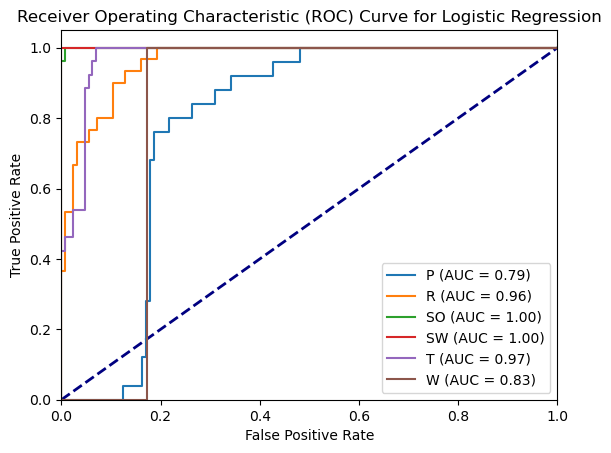

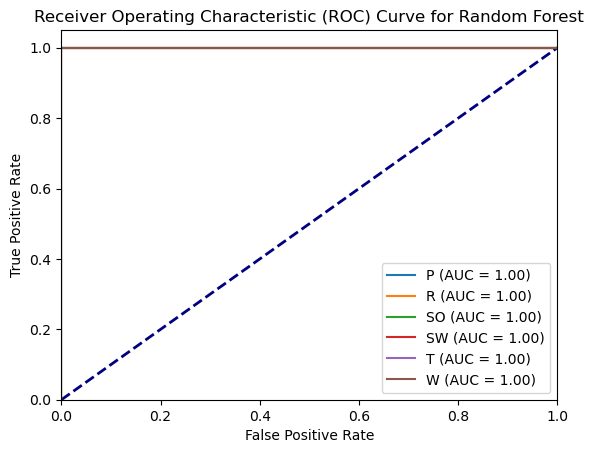

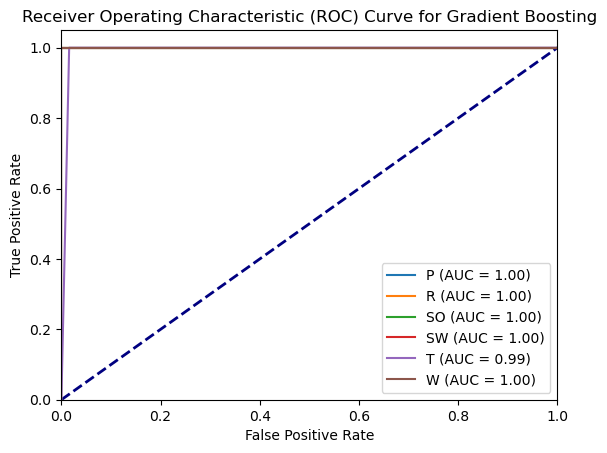

In [130]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Initialize a dictionary to store fpr, tpr, and auc for each class
roc_curves = {}

# Loop through models and calculate ROC curve for each class
for model_name, class_models in best_models.items():
    class_roc_curves = {}
    for class_name, model in class_models.items():
        # Compute predicted probabilities for positive class
        y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test[class_name], y_pred_prob)
        roc_auc = auc(fpr, tpr)
        class_roc_curves[class_name] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}
    roc_curves[model_name] = class_roc_curves

# Plot ROC curve for each class for each model
for model_name, class_roc_curves in roc_curves.items():
    plt.figure()
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {model_name}')
    for class_name, roc_curve_data in class_roc_curves.items():
        plt.plot(roc_curve_data['fpr'], roc_curve_data['tpr'],
                 label=f'{class_name} (AUC = {roc_curve_data["auc"]:.2f})')
    plt.legend(loc='lower right')
    plt.show()
